<div style="display:block" direction=rtl align=right><br><br>
    <div style="display:block" align=left display=block> 
        <font size=5><b>Introduction to Machine Learning - Part 3</b></font><br>
        <hr />
        <font size=3><b><a href="mailto:yara.mohamadi@gmail.com">yara.mohamadi@gmail.com</a></b><br></font><br>
        <font size=3><b><a href="https://github.com/yaramohamadi/Machine_Learning_intro">github.com/yaramohamadi/Machine_Learning_intro</a></b><br></font><br>

</div>

<hr>
<hr>
<hr>

# Feature Selection & Feature Extraction

### Why reduce dimensionality?

Reducing the number of dimensions in our datasets has multiple benefits:

Our dataset will:
- be less complex
- require less memory
- require less computation time
- have lower chance of model overfitting


### Feature selection

- Sometimes our goal is feature selection, not classification. <br>
- Sometimes our goal is explanation. insight into which feature is important.

Easiest way to reduce dimensionality is to only select the features that are important to us from a larger data set. But how to know which features are important.

If we have expertise on what the domain and the data is about, we might know by heart which features to keep.

E.g. a person's favorite color is irrelevant if we want to predict whether they will pay back their loan.

| Income | Age | Favorite Color |
|--------|-----|----------------|
| 10000  | 18  | Red            |
| 30000  | 30  | Green          |
| 20000  | 20  | Blue           |
| 50000  | 45  | Purple         |

```insurance_df.drop('favorite color', axis=1)```


| Income | Age |
|--------|-----|
| 10000  | 18  |
| 30000  | 30  |
| 20000  | 20  |
| 50000  | 45  |

If we are new to a dataset, we will have to do some exploring before we can take a decision on which features can be dropped

### Building a pairplot on Iris dataset

We can spot that Petal Width and Petal Length are very correlated, since their scatterplot is diagonal. Since both features carry the same information, it makes perfect sense to drop one of them.


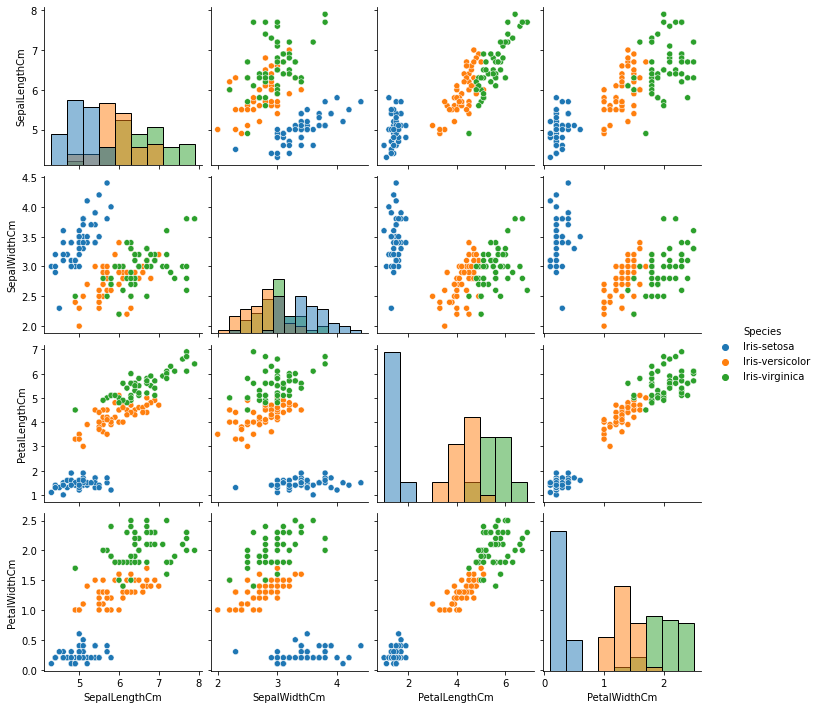

In [10]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('iris.csv')
sns.pairplot(df.iloc[:, 1:6], hue='Species', diag_kind='hist')

#### Some methods for feature selection:
- Manual and unsupervised (Feature Importance, Correlation, Domain Knowledge)
- Forward Selection
- Backward Elimination
- Intrinsic methods (L1 norm, Decision Trees, ...)

When we apply feature selection, we completely remove a feature and information it holds from the dataset. Such as the red column in this example. We try to minimize information loss by removing features that are irrelevant or hold little unique information. 
<br>

### Feature Extraction

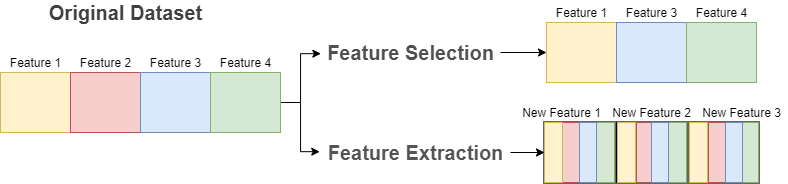

Compared to feature selection, feature extraction is a completely different approach, but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our dataset, we will calculate or extract new features from the original ones. These new features have less redundant information compared to the original ones. Therefore they are fewer in number. One downside is that the newly created features are less intuitive to understand than the original ones.

### Some methods for feature extraction
- Manual (Domain Knowledge) 
<br> E.g, Count Vectorizer
- PCA, LDA, ...
- Autoencoders

The dimensionality of datasets, with a lot of strong correlations between the different features in it can be reduced a lot with feature extraction. Intuitively this makes sense. E.g. If I were to tell you a person has long feet, long hands, long arms, ..., I could probably just summarize that this person is tall!

In fact, we can reduce the dimensions from the Iris dataset sample from 4 to 2, with PCA (principal component analysis) while keeping 98% variance in the data.


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(df.iloc[:, 1:5]).transform(df.iloc[:, 1:5])


# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.92461621 0.05301557]
